### 이산 확률 분포
- 1) 베르누이 분포
- 2) 이항 분포
- 3) 카테고리 분포
- 4) 다항 분포

이산 확률 분포에 대해 다루기 전에 Scipy의 확률 분포 기능에 대해서 다루고 시작하겠습니다

In [30]:
import scipy as sp
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

In [13]:
#객체 생성하기 -- 정규 분포 객체 예시
rv = sp.stats.norm()
rv

In [5]:
#모수 지정하기 -- 정규 분포의 모수는 expectation과 varianace입니다.
rv = sp.stats.norm(loc=1,scale=2)
rv

<IPython.core.display.Javascript object>


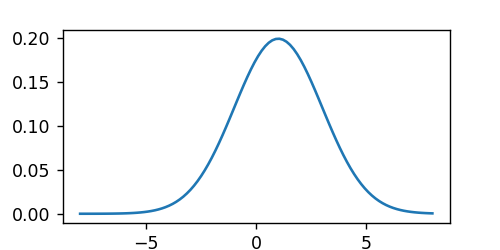

In [8]:
#확률 밀도 함수 생성
xx= np.linspace(-8,8,100)
plt.figure(figsize=(4,2))
pdf = rv.pdf(xx)
plt.plot(xx,pdf)
plt.show()

<IPython.core.display.Javascript object>


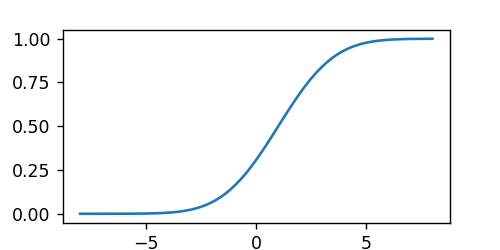

In [11]:
#누적 분포 함수 생성
xx= np.linspace(-8,8,100)
plt.figure(figsize=(4,2))
cdf = rv.cdf(xx)
plt.plot(xx,cdf)
plt.show()

In [12]:
rv.rvs(size=(3,5),random_state=0)
#random_state= 구문은 seed값을 지정해주는 명령어입니다.

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

<IPython.core.display.Javascript object>


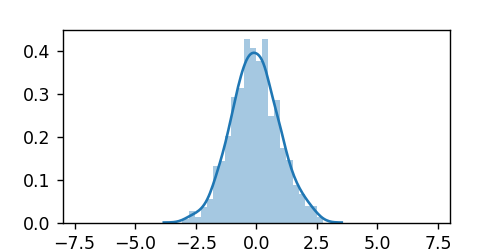

In [16]:
plt.figure(figsize=(4,2))
sns.distplot(rv.rvs(size=1000,random_state=0))
plt.xlim(-8,8)
plt.show()

이산 확률 분포에 대해 시작해보겠습니다~!!

### Bernoulli Distribution
- Bernoulli Trial -- Outcome only can be 1 and 0(numerical expression or Success or Failure.
- Bernoulli random variable 
    - discrete random variable 
    - follows probabiltiy mass function
        - Bern(x;theta) 
        - theta : if x =1 (success or fullfill the condition)
        - (1-theta) : if x =0 (failure or complement of above condition)
        - theta^x * (1-theta)^(1-x) : this expression due to x can be only 1 or 0
- Moment of Bernoulli distribution
    - first moment(Expection) : `(1*theta) + ((1-theta)*0) = theta`
    - second moment(Variacne) : `theata(1-theta) `apply sigma(x_i-mu)^2 P(x)
- Parameter estimation of Bernoulli distribution
    - theta^ = N_1/N (N_1 means times of x=1 show)

#### SciPy 를 사용한 베르누이 확률 변수의 시뮬레이션

In [18]:
theta = 0.6 # bernoulli 의 parameter는 theta 하나입니다.
rv = sp.stats.bernoulli(theta)
rv

<IPython.core.display.Javascript object>


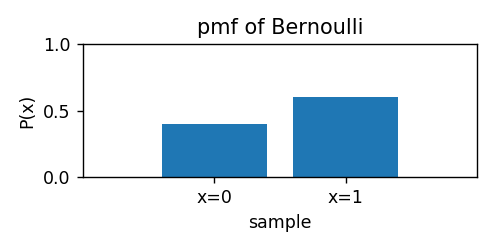

In [22]:
xx=[0,1]
plt.figure(figsize=(4,2))
plt.bar(xx,rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("sample")
plt.ylabel("P(x)")
plt.title("pmf of Bernoulli")
plt.tight_layout()
plt.show()

In [24]:
#시뮬레이션을 하기 위해서는 sample이 필요하겠죠?
x = rv.rvs(100,random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

<IPython.core.display.Javascript object>


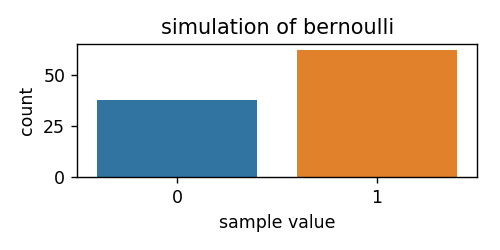

In [27]:
#seaborn 의 counplot 명령을 사용합니다.
plt.figure(figsize=(4,2))
sns.countplot(x)
plt.title('simulation of bernoulli')
plt.xlabel('sample value')
plt.tight_layout()
plt.show()

In [29]:
y= np.bincount(x,minlength=2)/len(x)
y

array([0.38, 0.62])

In [39]:
df=pd.DataFrame({'theory':rv.pmf(xx),'simulation':y})
df.index=[0,1]
df

,simulation,theory
0,0.38,0.4
1,0.62,0.6


In [45]:
df2=df.stack().reset_index()
df2.columns=['sample','type','ratio']
df2

,sample,type,ratio
0,0,simulation,0.38
1,0,theory,0.40
2,1,simulation,0.62
3,1,theory,0.60


<IPython.core.display.Javascript object>


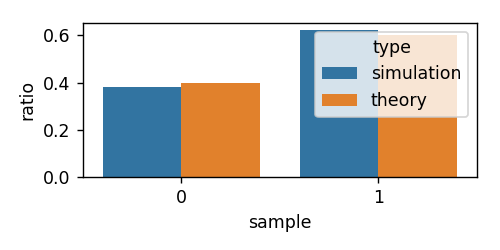

In [46]:
plt.figure(figsize=(4,2))
sns.barplot(x='sample',y='ratio',hue='type',data=df2)
plt.tight_layout()
plt.show()

### Binomial Distribution
- N times of Bernoulli trial
- X ~ Bin(x;N,theta)
- Y ~ Bern(x;theta)
- x = sigma(y_i)from 1 to N 
    - it means that Binomial dist is summantion of N times Bernoulli trial
- Bin(x;N,theta) = `nCx * theta^x (1-theta)^(N-x)`
- Moment of Binomial distribution
    - first moment(Expectation) : `N*theta` cuz, Bernoulli's E is theta and Binom is N times of Bernoulli trial therefore, expectation is N times of theata N*theta
    - Second moment(Variance) : `N*theta(1-theta)` this can be interpret by same logic as above explaination.

In [47]:
# 이항 분포에는 두 개의 parameter가 요구됩니다. N,theta
theata = 0.6
N = 10
rv = sp.stats.binom(N,theta)
rv

<IPython.core.display.Javascript object>


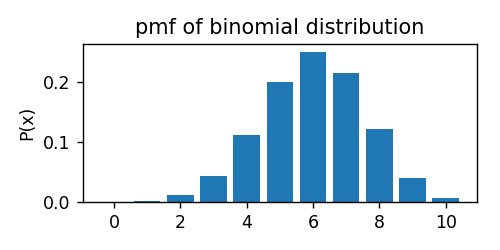

In [49]:
#pmf 그리기
xx = np.arange(N+1)
plt.figure(figsize=(4,2))
plt.bar(xx,rv.pmf(xx),align = 'center')
plt.ylabel('P(x)')
plt.title('pmf of binomial distribution')
plt.tight_layout()
plt.show()

In [50]:
x = rv.rvs(100,random_state=0)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

<IPython.core.display.Javascript object>


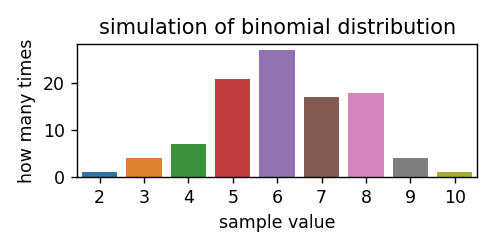

In [51]:
plt.figure(figsize=(4,2))
sns.countplot(x)
plt.title('simulation of binomial distribution')
plt.xlabel('sample value')
plt.ylabel('how many times')
plt.tight_layout()
plt.show()

In [91]:
y = np.bincount(x,minlength=N+1)/float(len(x))
y
#outcome of simulation

array([0.  , 0.  , 0.01, 0.04, 0.07, 0.21, 0.27, 0.17, 0.18, 0.04, 0.01])

In [96]:
df = pd.DataFrame({'theory':rv.pmf(xx),'simulation':y})
df[:5]

,simulation,theory
0,0.00,0.000105
1,0.00,0.001573
2,0.01,0.010617
3,0.04,0.042467
4,0.07,0.111477


In [97]:
df=df.stack().reset_index()
df.columns=['sample','type','probability']
df.pivot('sample','type','probability')
df

,sample,type,probability
0,0,simulation,0.000000
1,0,theory,0.000105
2,1,simulation,0.000000
3,1,theory,0.001573
4,2,simulation,0.010000
5,2,theory,0.010617
6,3,simulation,0.040000
7,3,theory,0.042467
8,4,simulation,0.070000
9,4,theory,0.111477


<IPython.core.display.Javascript object>


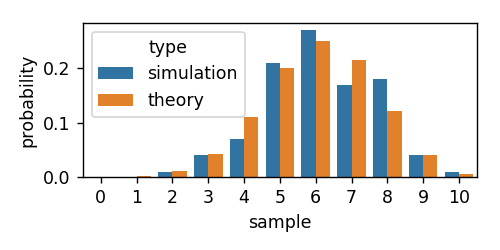

In [101]:
plt.figure(figsize=(4,2))
sns.barplot(x='sample',y='probability',hue='type',data=df)
plt.tight_layout()
plt.show()

Discrete_Probability_Distribution2에서는 Categorical dist 와 Multinomial dist에 대해서 다루도록 하겠습니다